In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'processed_file_test.csv'
df = pd.read_csv(file_path)
df['StartTime'] = pd.to_datetime(df['StartTime'])
#df = df.sort_values(by=['SettlementDate', 'SettlementPeriod'])
df = df.sort_values('StartTime')
df['Price_Change'] = df['Price'].pct_change()
df['Volatility'] = df['Price_Change'].rolling(window=5).std()
high_volatility_threshold = df['Volatility'].quantile(0.75)
low_volatility_threshold = df['Volatility'].quantile(0.25)
# Tag periods as high or low volatility
df['Volatility_Level'] = np.where(df['Volatility'] > high_volatility_threshold, 'High',
                                  np.where(df['Volatility'] < low_volatility_threshold, 'Low', 'Medium'))
df['Day_of_Week'] = df['StartTime'].dt.day_name()
df['Hour_of_Day'] = df['StartTime'].dt.hour
day_of_week_trends = df.groupby('Day_of_Week')['Price'].mean().sort_index()
time_of_day_trends = df.groupby('Hour_of_Day')['Price'].mean()

Summary Statistics:
             Price       Volume  EMBEDDED_WIND_GENERATION  \
count  4416.000000  4416.000000               4416.000000   
mean     88.361363  2247.789232               2187.541893   
std      38.733398   731.742650               1486.900666   
min     -12.270000    25.250000                244.000000   
25%      75.360000  1744.662500               1015.750000   
50%      90.500000  2210.850000               1824.000000   
75%     104.447500  2692.525000               3049.000000   
max     605.170000  5819.650000               5962.000000   

       EMBEDDED_SOLAR_GENERATION  
count                4416.000000  
mean                  688.280118  
std                  1448.327459  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                   623.000000  
max                  8839.000000  
Correlation Matrix:
                              Price  EMBEDDED_WIND_GENERATION  \
Price                      1.0

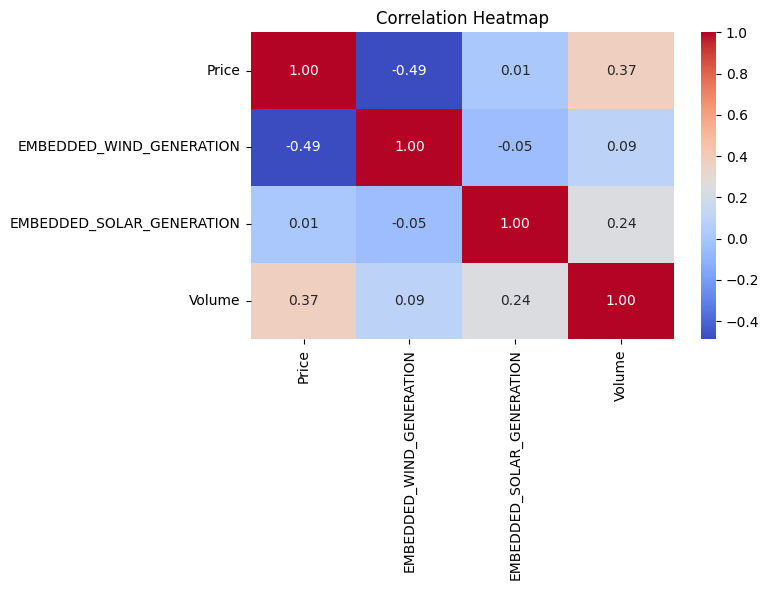

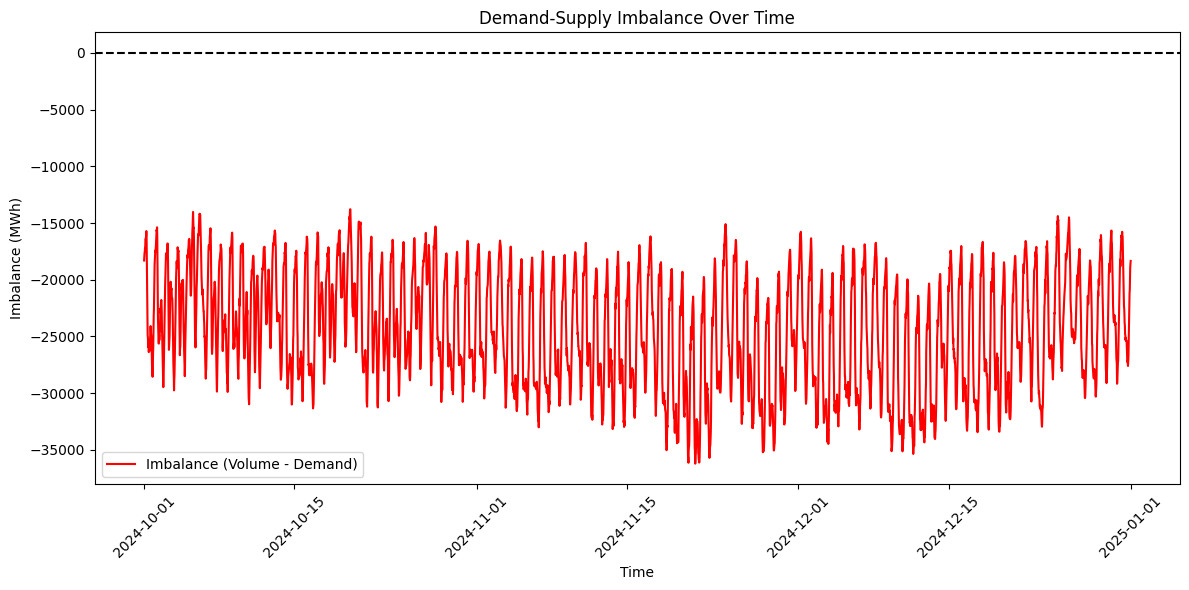

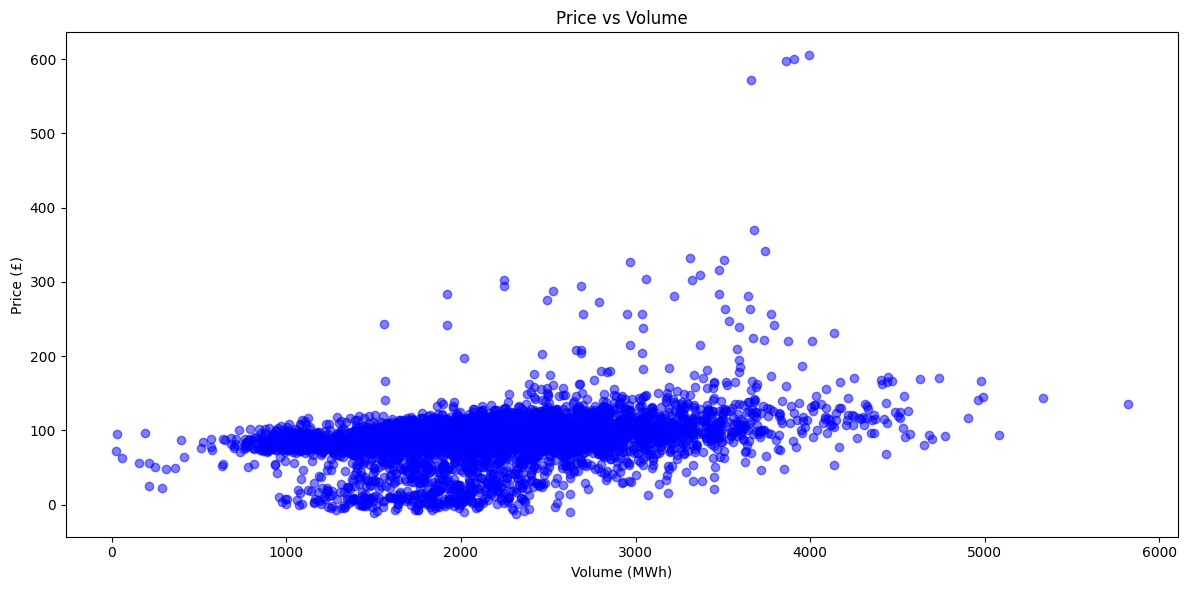

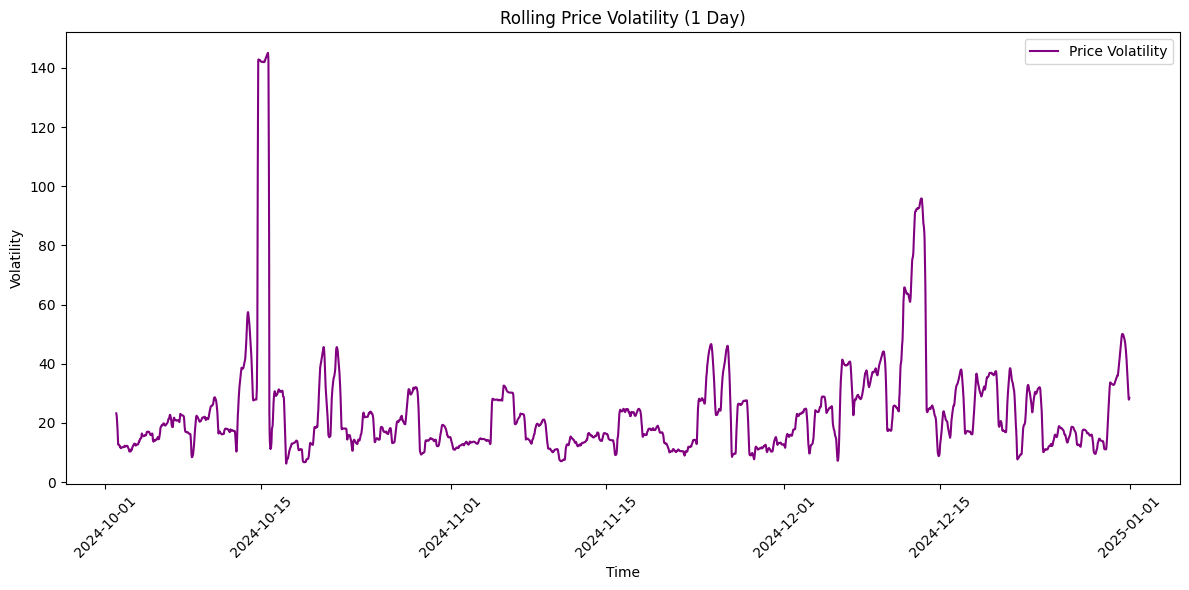

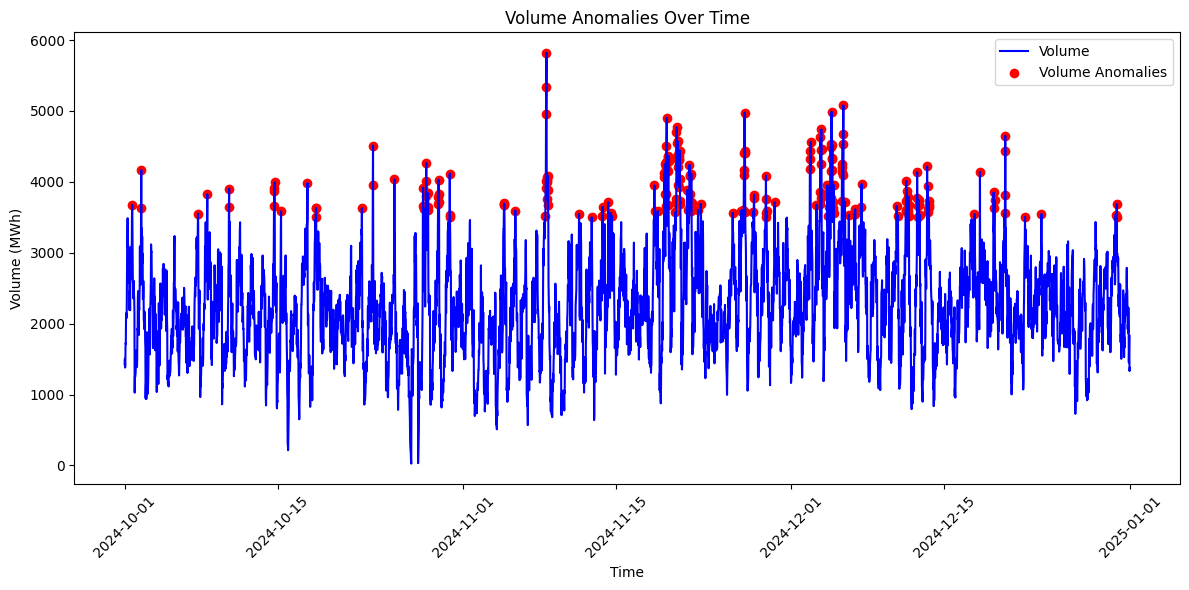

Volume Anomalies Detected:
                     StartTime   Volume   Price
33   2024-10-01 16:30:00+00:00  3673.10   95.23
72   2024-10-02 12:00:00+00:00  3636.70   80.13
73   2024-10-02 12:30:00+00:00  4167.85   77.78
322  2024-10-07 17:00:00+00:00  3549.95  129.88
363  2024-10-08 13:30:00+00:00  3824.80   73.80
...                        ...      ...     ...
3955 2024-12-22 09:30:00+00:00  3508.10   62.78
4027 2024-12-23 21:30:00+00:00  3548.15   94.03
4353 2024-12-30 16:30:00+00:00  3538.80  125.62
4357 2024-12-30 18:30:00+00:00  3504.50  126.82
4358 2024-12-30 19:00:00+00:00  3687.80  118.00

[221 rows x 3 columns]


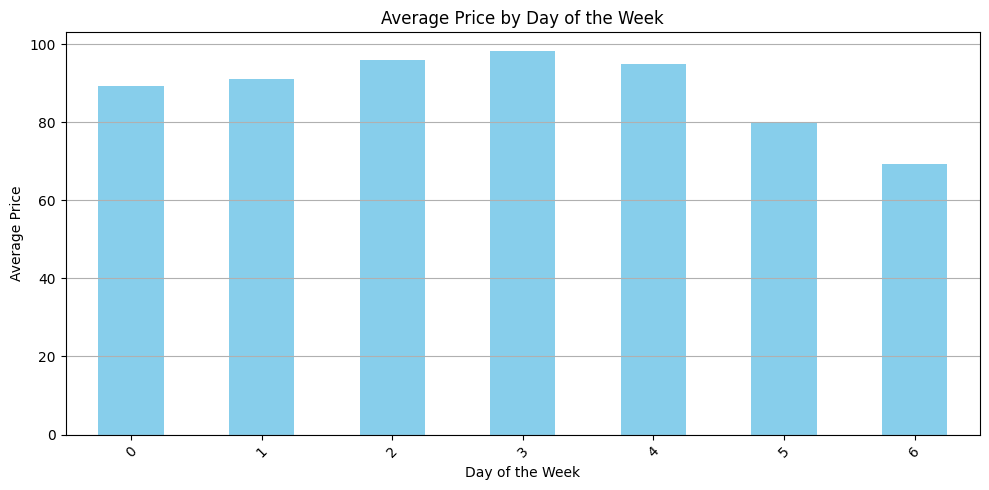

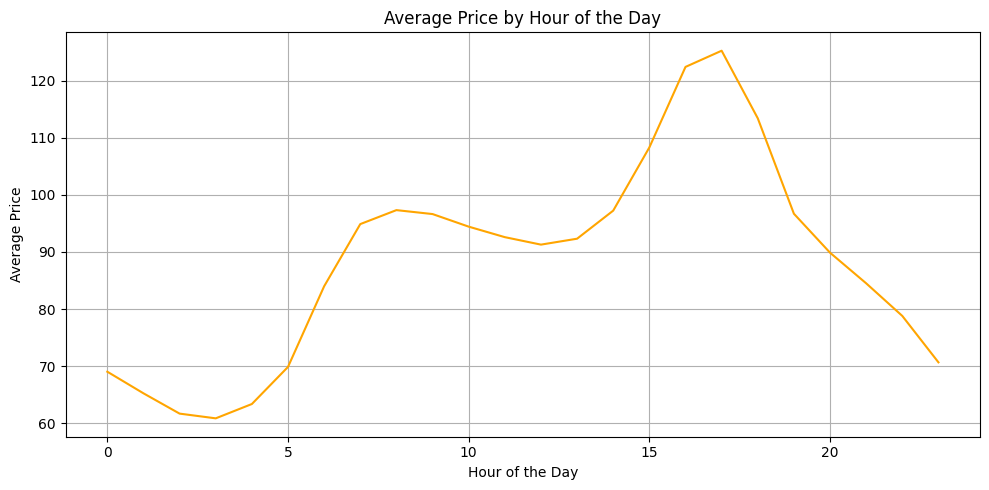

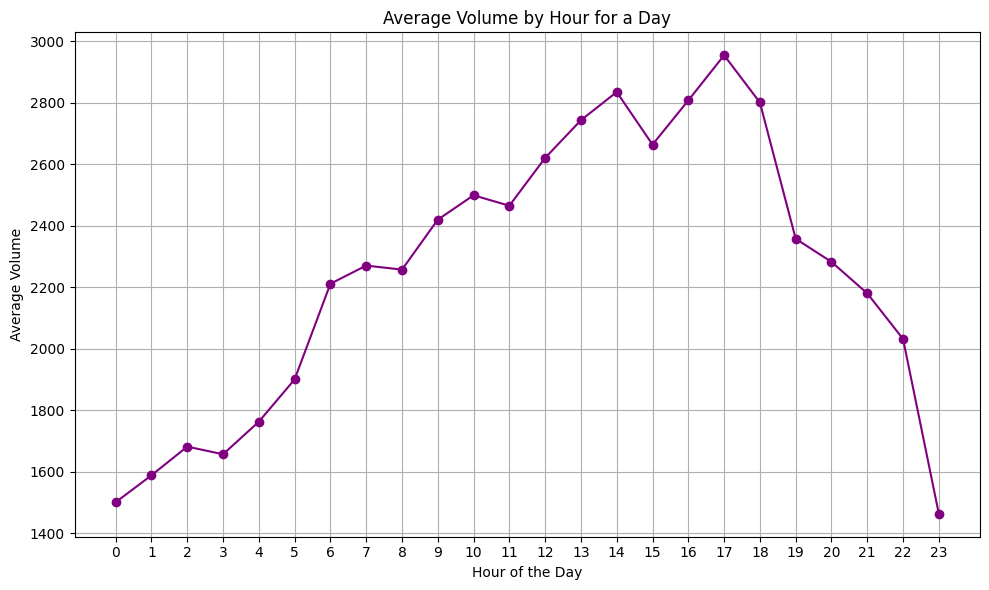

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'Uniformed_Data.csv'
data = pd.read_csv(data_path)

# Convert columns to appropriate data types
data['StartTime'] = pd.to_datetime(data['StartTime'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data['EMBEDDED_WIND_GENERATION'] = pd.to_numeric(data['EMBEDDED_WIND_GENERATION'], errors='coerce')
data['EMBEDDED_SOLAR_GENERATION'] = pd.to_numeric(data['EMBEDDED_SOLAR_GENERATION'], errors='coerce')
data['ENGLAND_WALES_DEMAND'] = pd.to_numeric(data['ENGLAND_WALES_DEMAND'], errors='coerce')

# Drop rows with missing data in key columns
data = data.dropna(subset=['StartTime', 'Price', 'Volume', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION', 'ENGLAND_WALES_DEMAND'])

# --- 1. Summary Statistics ---
print("Summary Statistics:")
print(data[['Price', 'Volume', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION']].describe())

# --- 2. Correlation Analysis ---
correlation_matrix = data[['Price', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION', 'Volume']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- 5. Demand-Supply Imbalance ---
data['Demand_Supply_Imbalance'] = data['Volume'] - data['ENGLAND_WALES_DEMAND']
plt.figure(figsize=(12, 6))
plt.plot(data['StartTime'], data['Demand_Supply_Imbalance'], label='Imbalance (Volume - Demand)', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Demand-Supply Imbalance Over Time')
plt.xlabel('Time')
plt.ylabel('Imbalance (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- 6. Volume and Price Scatter Plot ---
plt.figure(figsize=(12, 6))
plt.scatter(data['Volume'], data['Price'], alpha=0.5, color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume (MWh)')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()

# --- 7. Price Volatility Analysis ---
data['Price_volatility'] = data['Price'].rolling(window=48).std()  # 48 half-hour periods = 1 day
plt.figure(figsize=(12, 6))
plt.plot(data['StartTime'], data['Price_volatility'], label='Price Volatility', color='purple')
plt.title('Rolling Price Volatility (1 Day)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. Anomaly Detection (Volume) ---
volume_threshold = data['Volume'].quantile(0.95)  # Top 5% of volumes as anomalies
volume_anomalies = data[data['Volume'] > volume_threshold]

plt.figure(figsize=(12, 6))
plt.plot(data['StartTime'], data['Volume'], label='Volume', color='blue')
plt.scatter(volume_anomalies['StartTime'], volume_anomalies['Volume'], color='red', label='Volume Anomalies', marker='o')
plt.title('Volume Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Volume (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Volume Anomalies Detected:")
print(volume_anomalies[['StartTime', 'Volume', 'Price']])

# --- 9. Plot price trends by day of the week ---
# Calculate the average price by day of the week
data['Day_of_Week'] = data['StartTime'].dt.dayofweek
day_of_week_trends = data.groupby('Day_of_Week')['Price'].mean()

plt.figure(figsize=(10, 5))
day_of_week_trends.plot(kind='bar', color='skyblue')
plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 10. Plot price trends by time of the day ---
# Calculate the average price by hour of the day
data['Hour_of_Day'] = data['StartTime'].dt.hour
time_of_day_trends = data.groupby('Hour_of_Day')['Price'].mean()

plt.figure(figsize=(10, 5))
time_of_day_trends.plot(kind='line', color='orange')
plt.title('Average Price by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 11. Calculate the average volume by hour of the day ---
avg_volume_by_hour = data.groupby('Hour_of_Day')['Volume'].mean()

# Plot the average volume by hour for the day
plt.figure(figsize=(10, 6))
plt.plot(avg_volume_by_hour.index, avg_volume_by_hour, marker='o', color='purple')
plt.title('Average Volume by Hour for a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Volume')
plt.xticks(range(0, 24))  # Ensure all 24 hours are labeled
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans

In [ ]:
# Load your dataset
df_test = pd.read_csv('processed_file_test.csv') # Replace with your dataset path
df_train = pd.read_csv('processed_file_train_1.csv')

# Calculate price fluctuation as the percentage change
df_test['price_fluctuation'] = df_test['Price'].pct_change().fillna(0)
df_train['price_fluctuation'] = df_train['Price'].pct_change().fillna(0)

# Replace NaN with 0 and infinite values with large finite values
df_test['price_fluctuation'].replace([float('inf'), float('-inf')], 0, inplace=True)
df_test['price_fluctuation'].fillna(0, inplace=True)

# Replace NaN with 0 and infinite values with large finite values
df_train['price_fluctuation'].replace([float('inf'), float('-inf')], 0, inplace=True)
df_train['price_fluctuation'].fillna(0, inplace=True)

# Prepare data
X_test = df_test[['price_fluctuation']].values
X_train = df_train[['price_fluctuation']].values


# Train HMM
hmm = GaussianHMM(n_components=4, covariance_type='diag', n_iter=1000)
hmm.fit(X_train)

# Predict regimes
df_test['hmm_regime'] = hmm.predict(X_test)

# Train GMM
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gmm.fit(X_train)

# Predict regimes
df_test['gmm_regime'] = gmm.predict(X_test)



<ipython-input-7-7110e3a4afc9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['price_fluctuation'].replace([float('inf'), float('-inf')], 0, inplace=True)
<ipython-input-7-7110e3a4afc9>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
regime_counts_1 = df_test['hmm_regime'].value_counts()
regime_counts_2 = df_test['gmm_regime'].value_counts()

print(regime_counts_1)
print(regime_counts_2)

hmm_regime
0    3769
2     595
1      67
Name: count, dtype: int64
gmm_regime
0    3787
2     549
3      87
1       8
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score
# Compare silhouette scores
gmm_score = silhouette_score(X_test, df_test['gmm_regime'])
print(f'GMM Silhouette Score: {gmm_score:.2f}')

hmm_score = silhouette_score(X_test, df_test['hmm_regime'])
print(f'HMM Silhouette Score: {hmm_score:.2f}')

GMM Silhouette Score: 0.64
HMM Silhouette Score: 0.61


In [ ]:
import plotly.express as px

# Create a scatter plot with Plotly
df_test['index'] = np.arange(len(df_test))
fig = px.scatter(
    df_test,
    x='price_fluctuation',
    y='hmm_regime',
    color='hmm_regime',
    color_continuous_scale='plasma',  # Better color scheme
    title='Price Fluctuation vs Regime Classification',
    labels={'price_fluctuation': 'Price Fluctuation', 'hmm_regime': 'Regime'}
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    xaxis_title='Price Fluctuation',
    yaxis_title='Regime',
    coloraxis_colorbar=dict(title='Regime')
)

fig.show()

import plotly.express as px

# Create a scatter plot with Plotly
df_test['index'] = np.arange(len(df_test))
fig = px.scatter(
    df_test,
    x='price_fluctuation',
    y='gmm_regime',
    color='gmm_regime',
    color_continuous_scale='plasma',  # Better color scheme
    title='Price Fluctuation vs Regime Classification',
    labels={'price_fluctuation': 'Price Fluctuation', 'gmm_regime': 'Regime'}
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    xaxis_title='Price Fluctuation',
    yaxis_title='Regime',
    coloraxis_colorbar=dict(title='Regime')
)

fig.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:

df_train = pd.read_csv("technical_indicators_train.csv")
df_test = pd.read_csv("technical_indicators_test.csv")

# Convert StartTime to datetime format
df_train['StartTime'] = pd.to_datetime(df_train['StartTime'])
df_test['StartTime'] = pd.to_datetime(df_test['StartTime'])

# Sort values by time
df_train = df_train.sort_values(by='StartTime')
df_test = df_test.sort_values(by='StartTime')

df_test.drop(['DataProvider', 'SettlementDate', 'SettlementPeriod'], axis=1, inplace=True)
df_train.drop(['DataProvider', 'SettlementDate', 'SettlementPeriod'], axis=1, inplace=True)

# Define features (all technical indicators except target)
features = df_train.columns.difference(['StartTime', 'Price'])  # Exclude time and target

In [ ]:
# Check for NaN and infinite values in train/test datasets
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values (you can choose different strategies here)
df_train.fillna(df_train.mean(), inplace=True)  # Fill with column mean
df_test.fillna(df_test.mean(), inplace=True)  # Fill with column mean

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_train[features] = scaler.fit_transform(df_train[features])
df_test[features] = scaler.transform(df_test[features])  # Now this should work!

# Define target variable (Price) and scale it
target = 'Price'
scaler_target = MinMaxScaler()
df_train[target] = scaler_target.fit_transform(df_train[[target]])
df_test[target] = scaler_target.transform(df_test[[target]])

In [ ]:
# Prepare LSTM input (convert to sequences)
def create_sequences(data, feature_cols, target_col, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[feature_cols].iloc[i:i+seq_length].values)
        y.append(data[target_col].iloc[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Using 24 half-hour periods (12 hours history)
X_train, y_train = create_sequences(df_train, features, target, seq_length)
X_test, y_test = create_sequences(df_test, features, target, seq_length)

# Reshape input for LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.0372 - val_loss: 0.0350
Epoch 2/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0103 - val_loss: 0.0364
Epoch 3/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0074 - val_loss: 0.0379
Epoch 4/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.0058 - val_loss: 0.0262
Epoch 5/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0047 - val_loss: 0.0222
Epoch 6/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0043 - val_loss: 0.0193
Epoch 7/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0040 - val_loss: 0.0236
Epoch 8/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0034 - val_loss: 0.0190
Epoch 9/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0035 - val_loss: 0.0187
Epoch 10/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0029 - val_loss: 0.0179
Epoch 11/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0032 - val_loss: 0.0211
Epoch 12/20
369/369 ━━━━━━━━━━━━

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


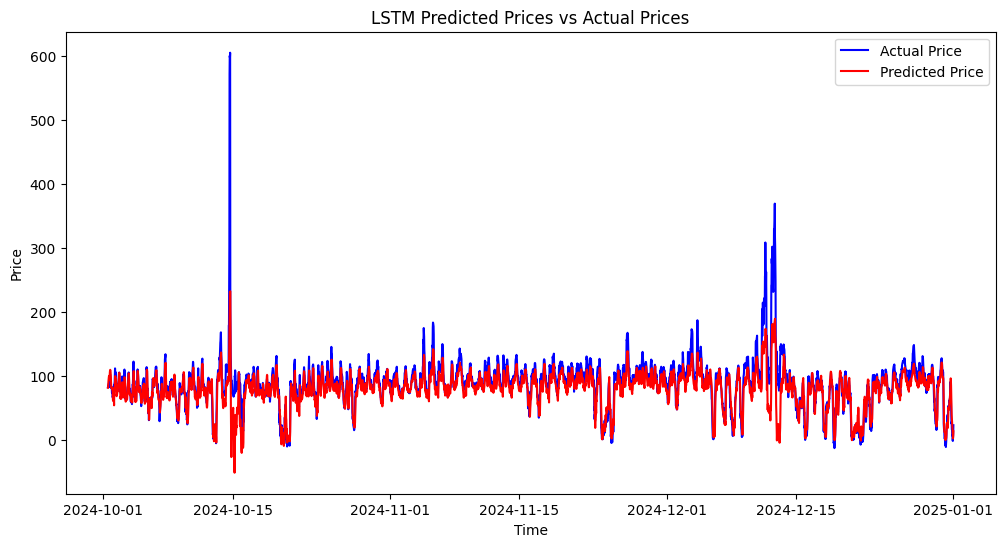

In [ ]:
# Predict prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler_target.inverse_transform(predicted_prices.reshape(-1, 1))  # Convert back to original scale

# Add predictions to test dataset
df_test = df_test.iloc[seq_length:].copy()  # Align sequences
df_test['Predicted_Price'] = predicted_prices

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df_test['StartTime'], scaler_target.inverse_transform(df_test[['Price']]), label="Actual Price", color='blue')
plt.plot(df_test['StartTime'], df_test['Predicted_Price'], label="Predicted Price", color='red')
plt.legend()
plt.title("LSTM Predicted Prices vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()



In [ ]:
# Compute Moving Average for Confirmation Strategy
df_test['SMA_24'] = df_test['Price'].rolling(window=24).mean()

# Compute ATR for Stop-Loss Strategy
df_test['ATR_24'] = df_test['Price'].rolling(window=24).std() * 1.5  # Approximation

# Initialize Trading Signals & Stop-Loss Variables
df_test['Signal'] = 0
df_test['Stop_Loss'] = np.nan
df_test['Take_Profit'] = np.nan

In [ ]:

# Strategy: LSTM + Moving Averages + Risk Management
for i in range(1, len(df_test) - 1):  # Prevent index out-of-bounds error
    current_date = df_test["StartTime"].iloc[i].date()
    next_date = df_test["StartTime"].iloc[i + 1].date()

    price = df_test["Price"].iloc[i]
    sma_24 = df_test["SMA_24"].iloc[i]
    atr_24 = df_test["ATR_24"].iloc[i]
    predicted_price = df_test["Predicted_Price"].iloc[i]

    # Define stop-loss and take-profit levels
    stop_loss = take_profit = None
    trade_signal = 0  # Default: No position

    if predicted_price > sma_24:  # Uptrend - Buy Signal
        trade_signal = 1
        stop_loss = price - atr_24
        take_profit = price + (atr_24 * 2)
    elif predicted_price < sma_24:  # Downtrend - Sell Signal
        trade_signal = -1
        stop_loss = price + atr_24
        take_profit = price - (atr_24 * 2)

    # Store trade details
    df_test.iloc[i, df_test.columns.get_loc("Signal")] = trade_signal
    df_test.iloc[i, df_test.columns.get_loc("Stop_Loss")] = stop_loss
    df_test.iloc[i, df_test.columns.get_loc("Take_Profit")] = take_profit

    # Verify if stop-loss or take-profit is hit before the next trade
    if trade_signal == 1:  # Long Position
        if df_test["Price"].iloc[i + 1] <= stop_loss:  # SL Triggered
            df_test.iloc[i, df_test.columns.get_loc("Signal")] = 0  # Exit trade
        elif df_test["Price"].iloc[i + 1] >= take_profit:  # TP Triggered
            df_test.iloc[i, df_test.columns.get_loc("Signal")] = 0  # Exit trade

    elif trade_signal == -1:  # Short Position
        if df_test["Price"].iloc[i + 1] >= stop_loss:  # SL Triggered
            df_test.iloc[i, df_test.columns.get_loc("Signal")] = 0  # Exit trade
        elif df_test["Price"].iloc[i + 1] <= take_profit:  # TP Triggered
            df_test.iloc[i, df_test.columns.get_loc("Signal")] = 0  # Exit trade

    # **Close All Positions at End of Day**
    if next_date and next_date != current_date:
        df_test.iloc[i, df_test.columns.get_loc("Signal")] = 0  # Square off all trades



In [ ]:
# Ensure integer-based index
df_test = df_test.reset_index(drop=True)

# Initialize trade tracking columns
df_test["Signal"] = 0  # Default: No trade
df_test["Stop_Loss"] = np.nan
df_test["Take_Profit"] = np.nan

# Variables for trade tracking
initial_capital = 10000  # Initial capital (adjust as needed)
capital = initial_capital  # Current capital
position = 0  # 1 for Buy, -1 for Sell
entry_price = 0  # Track entry price
returns = []
risk_per_trade = 0.02  # 2% of capital risked per trade

# Simplified Strategy: RSI + MACD + Risk Management
for i in range(1, len(df_test) - 1):  # Prevent index out-of-bounds error
    current_date = df_test["StartTime"].iloc[i].date()
    next_date = df_test["StartTime"].iloc[i + 1].date()

    price = df_test["Price"].iloc[i]
    sma_24 = df_test["PPCMA_24"].iloc[i]  # Using PPCMA_24 for trend analysis
    atr_24 = df_test["ATR_24"].iloc[i]
    predicted_price = df_test["Predicted_Price"].iloc[i]

    # Technical indicators
    rsi_6 = df_test["RSI_6"].iloc[i]
    macd = df_test["MACD"].iloc[i]
    macd_signal = df_test["MACD"].iloc[i + 1]  # Signal Line (next value)

    # Define thresholds for technical indicators
    rsi_threshold_buy = 30
    rsi_threshold_sell = 70

    # Calculate position size: risk_per_trade of current capital, adjusted by ATR
    position_size = (capital * risk_per_trade) / (atr_24 * 2)  # Adjusting for volatility

    # Strong Buy Signal
    if predicted_price > sma_24 and rsi_6 < rsi_threshold_buy and macd > macd_signal:
        trade_signal = 1  # Buy Signal
        stop_loss = price - (atr_24 * 1.5)
        take_profit = price + (atr_24 * 2)

    # Strong Sell Signal
    elif predicted_price < sma_24 and rsi_6 > rsi_threshold_sell and macd < macd_signal:
        trade_signal = -1  # Sell Signal
        stop_loss = price + (atr_24 * 1.5)
        take_profit = price - (atr_24 * 2)

    else:
        trade_signal = 0  # No position

    # Store trade details
    df_test.iloc[i, df_test.columns.get_loc("Signal")] = trade_signal
    df_test.iloc[i, df_test.columns.get_loc("Stop_Loss")] = stop_loss
    df_test.iloc[i, df_test.columns.get_loc("Take_Profit")] = take_profit

    # Handle trade logic for both long and short positions
    if trade_signal == 1:  # Long Position (Buy)
        if position == 0:  # Open position if no position is active
            position = 1
            entry_price = price

    elif trade_signal == -1:  # Short Position (Sell)
        if position == 0:  # Open position if no position is active
            position = -1
            entry_price = price

    # Handle Stop-Loss or Take-Profit
    if position == 1:  # Long Position
        if price <= stop_loss:  # Stop-Loss Triggered
            capital += (price - entry_price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position
        elif price >= take_profit:  # Take-Profit Triggered
            capital += (price - entry_price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position

    elif position == -1:  # Short Position
        if price >= stop_loss:  # Stop-Loss Triggered
            capital += (entry_price - price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position
        elif price <= take_profit:  # Take-Profit Triggered
            capital += (entry_price - price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position

    # **Close All Positions at End of Day**
    if next_date and next_date != current_date:
        if position != 0:  # If there's an open position at the end of the day
            if position == 1:  # Long position (Buy)
                capital += (price - entry_price) * position_size  # Exit at current price
            elif position == -1:  # Short position (Sell)
                capital += (entry_price - price) * position_size  # Exit at current price
            position = 0  # Square off all trades at the end of the day

# Calculate final return as a percentage of initial capital
total_pnl = capital - initial_capital  # Total Profit/Loss
return_percentage = (total_pnl / initial_capital) * 100  # Return Percentage

# Print the results
print(f"Total Profit/Loss: ₹{total_pnl:.2f}")
print(f"Final Capital: ₹{capital:.2f}")
print(f"Strategy Return: {return_percentage:.2f}%")


Total Profit/Loss: ₹9841.92
Final Capital: ₹19841.92
Strategy Return: 98.42%


<ipython-input-20-4fc11dd9361b>:52: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-20-4fc11dd9361b>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

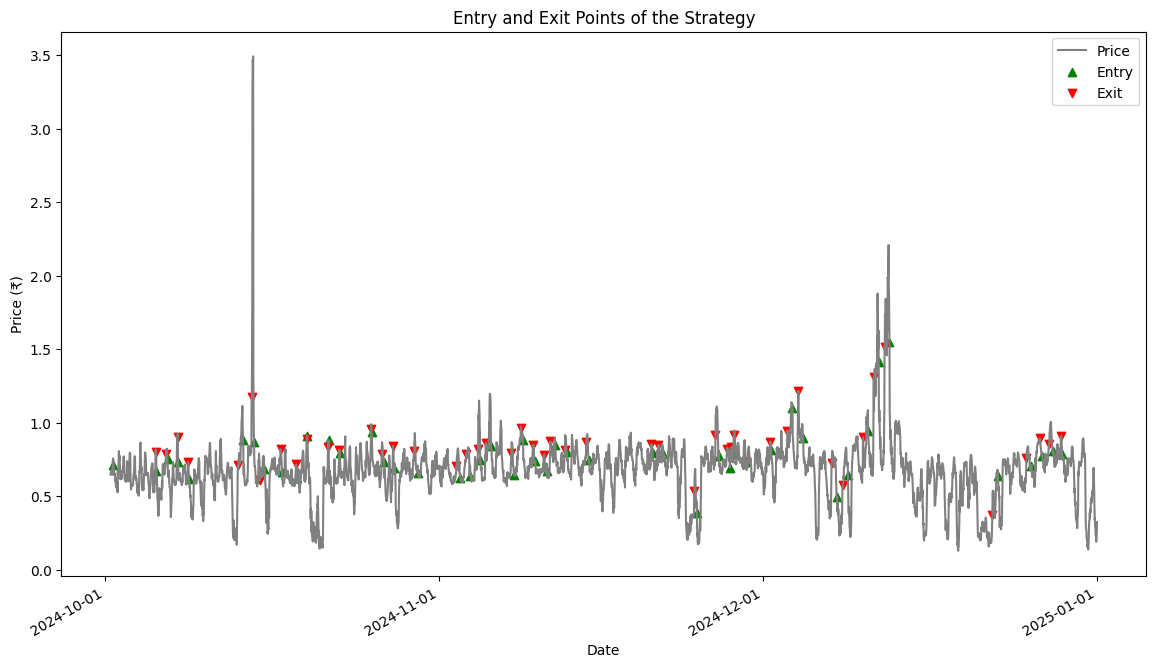

Sharpe Ratio: 0.13
Sortino Ratio: 0.05
Maximum Drawdown: -14.15%
Buy & Hold Strategy Return: 0.00%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import norm

# Portfolio tracking
df_test['Portfolio'] = initial_capital  # Initial portfolio value
df_test['Capital'] = capital
df_test['Buy_Hold_Portfolio'] = initial_capital  # Buy and hold portfolio for comparison

# Lists to track entries, exits, and corresponding prices
entry_points = []
exit_points = []
buy_and_hold_value = initial_capital  # Buy and hold portfolio value

# Variables for trade tracking
position = 0
entry_price = 0

# Re-run the strategy and track performance
for i in range(1, len(df_test) - 1):
    price = df_test["Price"].iloc[i]
    stop_loss = df_test["Stop_Loss"].iloc[i]
    take_profit = df_test["Take_Profit"].iloc[i]
    trade_signal = df_test["Signal"].iloc[i]

    if trade_signal == 1 and position == 0:  # Buy Signal (Long)
        position = 1
        entry_price = price
        entry_points.append(i)  # Record entry point
        df_test["Capital"].iloc[i] = capital - (capital * risk_per_trade)  # Track capital used
    elif trade_signal == -1 and position == 0:  # Sell Signal (Short)
        position = -1
        entry_price = price
        entry_points.append(i)  # Record entry point
        df_test["Capital"].iloc[i] = capital - (capital * risk_per_trade)  # Track capital used
    elif position == 1:  # Long position (Buy)
        if price <= stop_loss or price >= take_profit:
            exit_points.append(i)  # Record exit point
            capital += (price - entry_price) * (capital * risk_per_trade) / (atr_24 * 2)  # Calculate profit/loss
            df_test["Capital"].iloc[i] = capital  # Update capital
            position = 0  # Close position
    elif position == -1:  # Short position (Sell)
        if price >= stop_loss or price <= take_profit:
            exit_points.append(i)  # Record exit point
            capital += (entry_price - price) * (capital * risk_per_trade) / (atr_24 * 2)  # Calculate profit/loss
            df_test["Capital"].iloc[i] = capital  # Update capital
            position = 0  # Close position

    # Buy and Hold: Track if holding the stock from the beginning
    df_test["Buy_Hold_Portfolio"].iloc[i] = initial_capital * (price / df_test["Price"].iloc[0])


# Plot Entry and Exit points
plt.figure(figsize=(14, 8))
plt.plot(df_test['StartTime'], df_test['Price'], label="Price", color='gray')
plt.scatter(df_test['StartTime'].iloc[entry_points], df_test['Price'].iloc[entry_points], label="Entry", color='green', marker='^', alpha=1)
plt.scatter(df_test['StartTime'].iloc[exit_points], df_test['Price'].iloc[exit_points], label="Exit", color='red', marker='v', alpha=1)
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.title("Entry and Exit Points of the Strategy")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.show()

# Calculate performance metrics
returns_series = df_test["Capital"].pct_change().dropna()

# Sharpe Ratio
sharpe_ratio = (returns_series.mean() / returns_series.std()) * np.sqrt(252)  # Annualized Sharpe ratio

# Sortino Ratio
downside_returns = returns_series[returns_series < 0]
sortino_ratio = (returns_series.mean() / downside_returns.std()) * np.sqrt(252)

# Maximum Drawdown
cum_returns = (1 + returns_series).cumprod()
peak = cum_returns.cummax()
drawdown = (cum_returns - peak) / peak
max_drawdown = drawdown.min()

# Print the performance metrics
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Compare with Buy and Hold Strategy
buy_and_hold_return = (df_test['Buy_Hold_Portfolio'].iloc[-1] - initial_capital) / initial_capital
print(f"Buy & Hold Strategy Return: {buy_and_hold_return:.2%}")


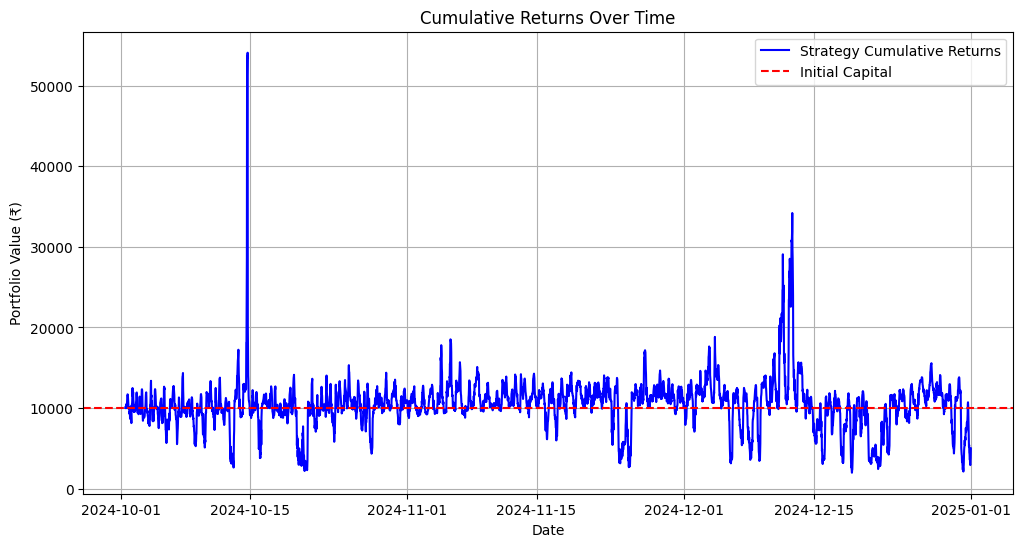

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate returns
df_test["Returns"] = df_test["Price"].pct_change().fillna(0)  # Assuming percentage change in price as return
df_test["Cumulative_Returns"] = (1 + df_test["Returns"]).cumprod() * initial_capital

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_test["StartTime"], df_test["Cumulative_Returns"], label="Strategy Cumulative Returns", color='b')
plt.axhline(y=initial_capital, color='r', linestyle='--', label="Initial Capital")

plt.xlabel("Date")
plt.ylabel("Portfolio Value (₹)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Ensure integer-based index
df_test = df_test.reset_index(drop=True)

# Initialize trade tracking columns
df_test["Signal"] = 0  # Default: No trade
df_test["Stop_Loss"] = np.nan
df_test["Take_Profit"] = np.nan
df_test["Portfolio_Value"] = initial_capital  # Initialize portfolio value with initial capital

# Variables for trade tracking
initial_capital = 10000  # Initial capital (adjust as needed)
capital = initial_capital  # Current capital
position = 0  # 1 for Buy, -1 for Sell
entry_price = 0  # Track entry price
risk_per_trade = 0.02  # 2% of capital risked per trade
returns = []

# Simplified Strategy: RSI + MACD + Risk Management
for i in range(1, len(df_test) - 1):  # Prevent index out-of-bounds error
    current_date = df_test["StartTime"].iloc[i].date()
    next_date = df_test["StartTime"].iloc[i + 1].date()

    price = df_test["Price"].iloc[i]
    sma_24 = df_test["PPCMA_24"].iloc[i]  # Using PPCMA_24 for trend analysis
    atr_24 = df_test["ATR_24"].iloc[i]
    predicted_price = df_test["Predicted_Price"].iloc[i]

    # Technical indicators
    rsi_6 = df_test["RSI_6"].iloc[i]
    macd = df_test["MACD"].iloc[i]
    macd_signal = df_test["MACD"].iloc[i + 1]  # Signal Line (next value)

    # Define thresholds for technical indicators
    rsi_threshold_buy = 30
    rsi_threshold_sell = 70

    # Calculate position size: risk_per_trade of current capital, adjusted by ATR
    position_size = (capital * risk_per_trade) / (atr_24 * 2)  # Adjusting for volatility

    # Strong Buy Signal
    if predicted_price > sma_24 and rsi_6 < rsi_threshold_buy and macd > macd_signal:
        trade_signal = 1  # Buy Signal
        stop_loss = price - (atr_24 * 1.5)
        take_profit = price + (atr_24 * 2)

    # Strong Sell Signal
    elif predicted_price < sma_24 and rsi_6 > rsi_threshold_sell and macd < macd_signal:
        trade_signal = -1  # Sell Signal
        stop_loss = price + (atr_24 * 1.5)
        take_profit = price - (atr_24 * 2)

    else:
        trade_signal = 0  # No position

    # Store trade details
    df_test.iloc[i, df_test.columns.get_loc("Signal")] = trade_signal
    df_test.iloc[i, df_test.columns.get_loc("Stop_Loss")] = stop_loss
    df_test.iloc[i, df_test.columns.get_loc("Take_Profit")] = take_profit

    # Handle trade logic for both long and short positions
    if trade_signal == 1:  # Long Position (Buy)
        if position == 0:  # Open position if no position is active
            position = 1
            entry_price = price

    elif trade_signal == -1:  # Short Position (Sell)
        if position == 0:  # Open position if no position is active
            position = -1
            entry_price = price

    # Handle Stop-Loss or Take-Profit
    if position == 1:  # Long Position
        if price <= stop_loss:  # Stop-Loss Triggered
            capital += (price - entry_price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position
        elif price >= take_profit:  # Take-Profit Triggered
            capital += (price - entry_price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position

    elif position == -1:  # Short Position
        if price >= stop_loss:  # Stop-Loss Triggered
            capital += (entry_price - price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position
        elif price <= take_profit:  # Take-Profit Triggered
            capital += (entry_price - price) * position_size  # Profit/Loss calculation
            position = 0  # Exit position

    # **Close All Positions at End of Day**
    if next_date and next_date != current_date:
        if position != 0:  # If there's an open position at the end of the day
            if position == 1:  # Long position (Buy)
                capital += (price - entry_price) * position_size  # Exit at current price
            elif position == -1:  # Short position (Sell)
                capital += (entry_price - price) * position_size  # Exit at current price
            position = 0  # Square off all trades at the end of the day

    # Store portfolio value (capital) at this point in time
    df_test.iloc[i, df_test.columns.get_loc("Portfolio_Value")] = capital

# Calculate final return as a percentage of initial capital
total_pnl = capital - initial_capital  # Total Profit/Loss
return_percentage = (total_pnl / initial_capital) * 100  # Return Percentage

# Print the results
print(f"Total Profit/Loss: ₹{total_pnl:.2f}")
print(f"Final Capital: ₹{capital:.2f}")
print(f"Strategy Return: {return_percentage:.2f}%")


<ipython-input-22-44d2586d095b>:101: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9856.457662195278' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Total Profit/Loss: ₹9841.92
Final Capital: ₹19841.92
Strategy Return: 98.42%


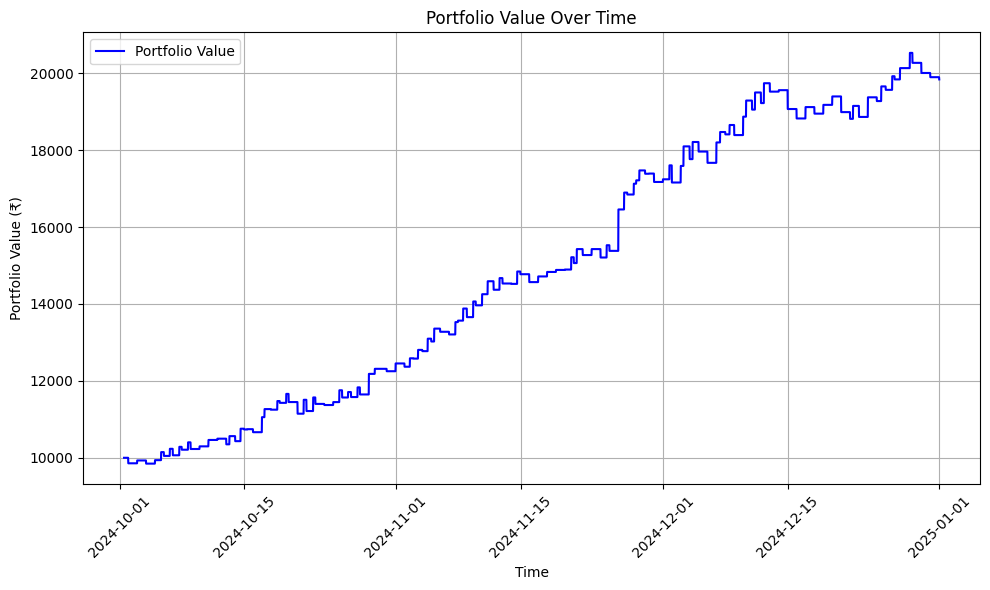

In [ ]:
import matplotlib.pyplot as plt

# Filter out entries for 1st January
df_test_filtered = df_test[df_test['StartTime'].dt.date != pd.to_datetime("2025-01-01").date()]

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(df_test_filtered['StartTime'], df_test_filtered['Portfolio_Value'], label='Portfolio Value', color='blue')

# Labeling the plot
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value (₹)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Assuming 'Portfolio_Value' column contains the portfolio value over time

# Calculate daily returns (percentage change of the portfolio value)
df_test["Portfolio_Return"] = df_test["Portfolio_Value"].pct_change()

# Assume a risk-free rate (this can be adjusted to your context)
risk_free_rate = 0.0

# Sharpe Ratio: Average Return / Standard Deviation of Return
average_return = df_test["Portfolio_Return"].mean()
portfolio_volatility = df_test["Portfolio_Return"].std()

# Sharpe Ratio (assuming risk-free rate is 0)
sharpe_ratio = (average_return - risk_free_rate) / portfolio_volatility

# Sortino Ratio: Average Return / Downside Deviation
# Calculate downside deviation (only negative returns are considered)
downside_returns = df_test[df_test["Portfolio_Return"] < 0]["Portfolio_Return"]
downside_deviation = downside_returns.std()

# Sortino Ratio
sortino_ratio = (average_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan

# Print the results
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Sharpe Ratio: 0.0059
Sortino Ratio: 0.0008
